In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dff = pd.read_csv("../2_data_preparation/merged_df.csv")
df = dff[dff["year"] <= 2019]

In [2]:
print(df.columns.tolist())


['country', 'year', 'SumEvents', 'GoldsteinScale', 'EventDescr', 'EventRootDescr', 'protest', 'participants_category', 'protesterdemand1', 'stateresponse1']


In [3]:
print(df["participants_category"].value_counts())


participants_category
100-999       636
50-99         399
2000-4999     248
>10000        214
5000-10000    102
1000-1999      62
Name: count, dtype: int64


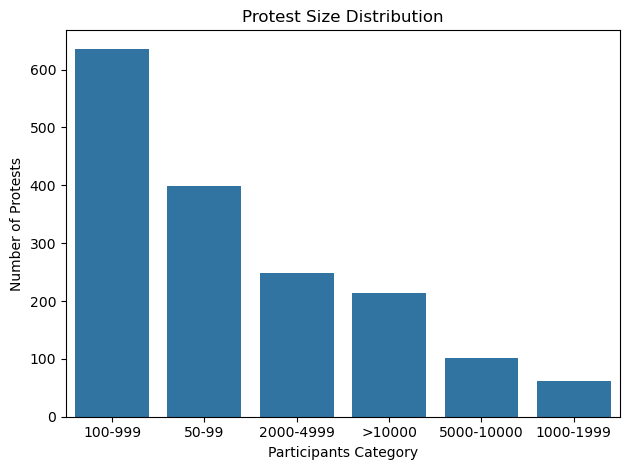

In [4]:
sns.countplot(
    data=df,
    x="participants_category",
    order=df["participants_category"].value_counts().index,
)
plt.title("Protest Size Distribution")
plt.xlabel("Participants Category")
plt.ylabel("Number of Protests")
plt.tight_layout()
plt.show()


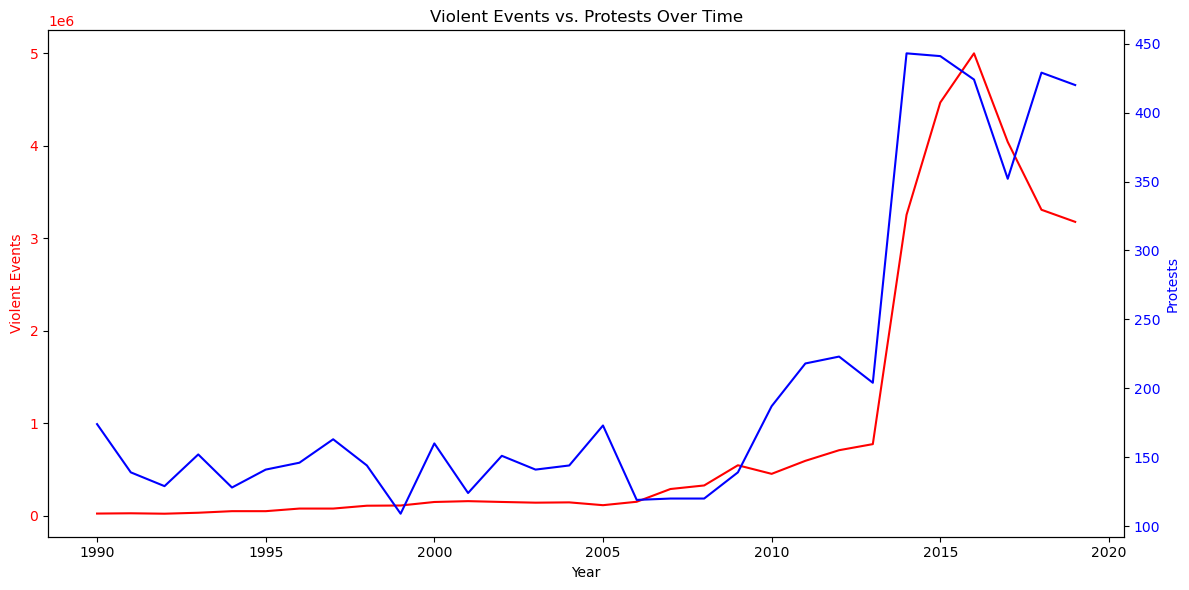

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Violent Events
ax1.plot(df.groupby("year")["SumEvents"].sum(), color="red", label="Violent Events")
ax1.set_xlabel("Year")
ax1.set_ylabel("Violent Events", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create twin axis for Protests
ax2 = ax1.twinx()
ax2.plot(df.groupby("year")["protest"].sum(), color="blue", label="Protests")
ax2.set_ylabel("Protests", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Title and layout
plt.title("Violent Events vs. Protests Over Time")
fig.tight_layout()
plt.show()


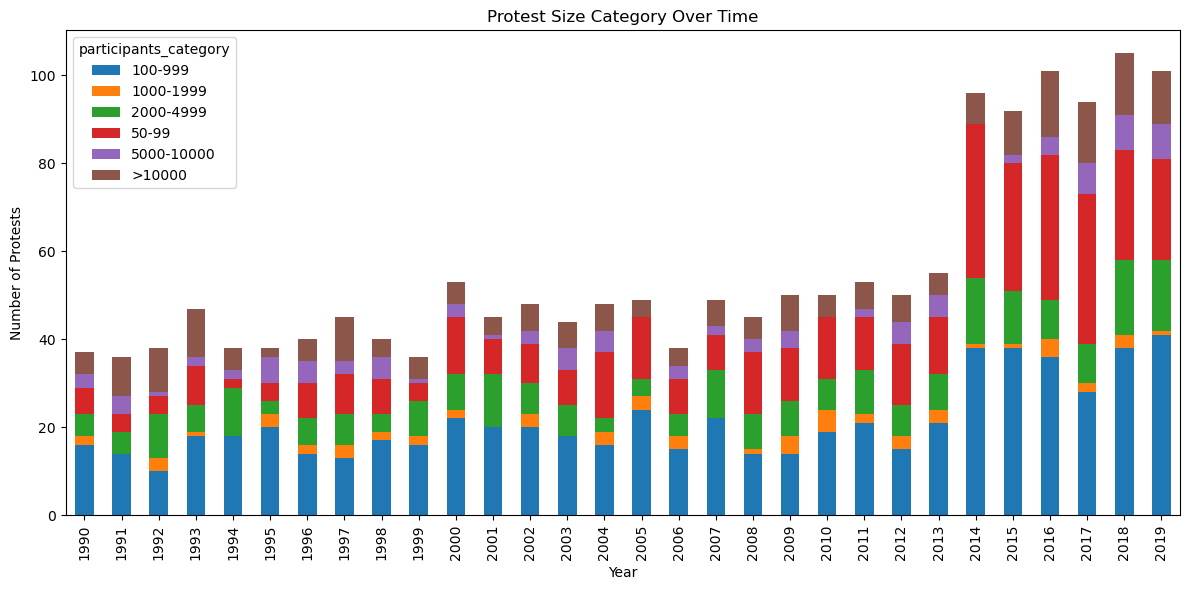

In [6]:
size_trend = df.groupby(["year", "participants_category"]).size().unstack(fill_value=0)

# Plot
size_trend.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Protest Size Category Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Protests")
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Most Violent Countries'}, xlabel='country'>

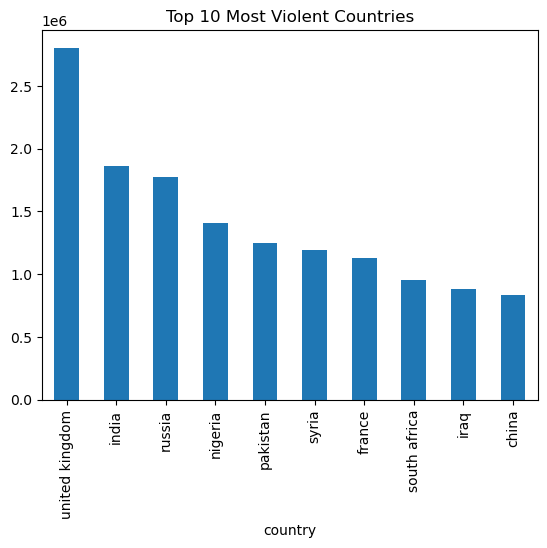

In [7]:
top_violent = (
    df.groupby("country")["SumEvents"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_violent.plot(kind="bar", title="Top 10 Most Violent Countries")


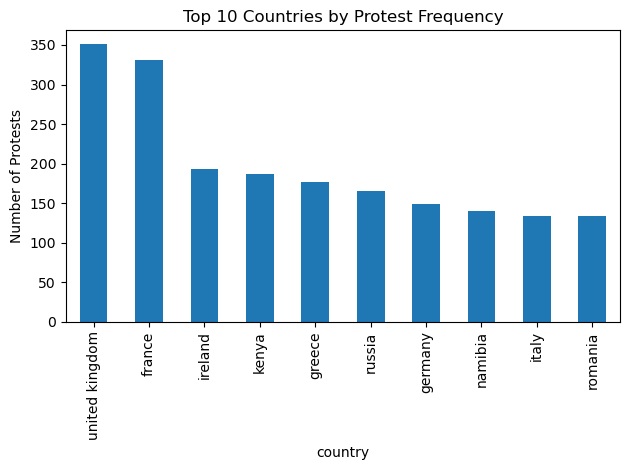

In [8]:
top_protest = (
    df.groupby("country")["protest"].sum().sort_values(ascending=False).head(10)
)
top_protest.plot(kind="bar", title="Top 10 Countries by Protest Frequency")
plt.ylabel("Number of Protests")
plt.tight_layout()
plt.show()


C:\Users\sahar\AppData\Local\Temp\ipykernel_24944\1200112335.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"demand_category"] = df["protesterdemand1"].apply(simplify_demands)


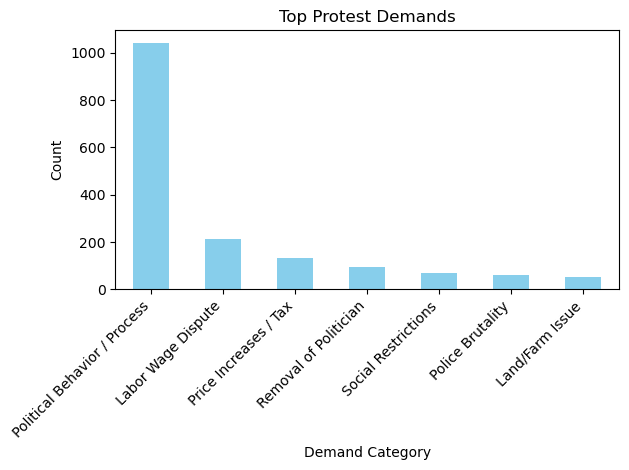

In [9]:
def simplify_demands(demand_str):
    if pd.isna(demand_str):
        return "Other/Unknown"

    demand_str = demand_str.lower().strip()
    demand_parts = [d.strip() for d in demand_str.split(";")]

    categories = {
        "political behavior, process": "Political Behavior / Process",
        "labor wage dispute": "Labor Wage Dispute",
        "price increases, tax policy": "Price Increases / Tax",
        "removal of politician": "Removal of Politician",
        "police brutality": "Police Brutality",
        "land farm issue": "Land/Farm Issue",
        "social restrictions": "Social Restrictions",
    }

    for part in demand_parts:
        if part in categories:
            return categories[part]

    return demand_str.title()  # Keep as-is with formatting if not matched


# Apply and plot
df.loc[:,"demand_category"] = df["protesterdemand1"].apply(simplify_demands)
top_demands = df["demand_category"].value_counts().head(10)

top_demands.plot(kind="bar", color="skyblue", title="Top Protest Demands")
plt.xlabel("Demand Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


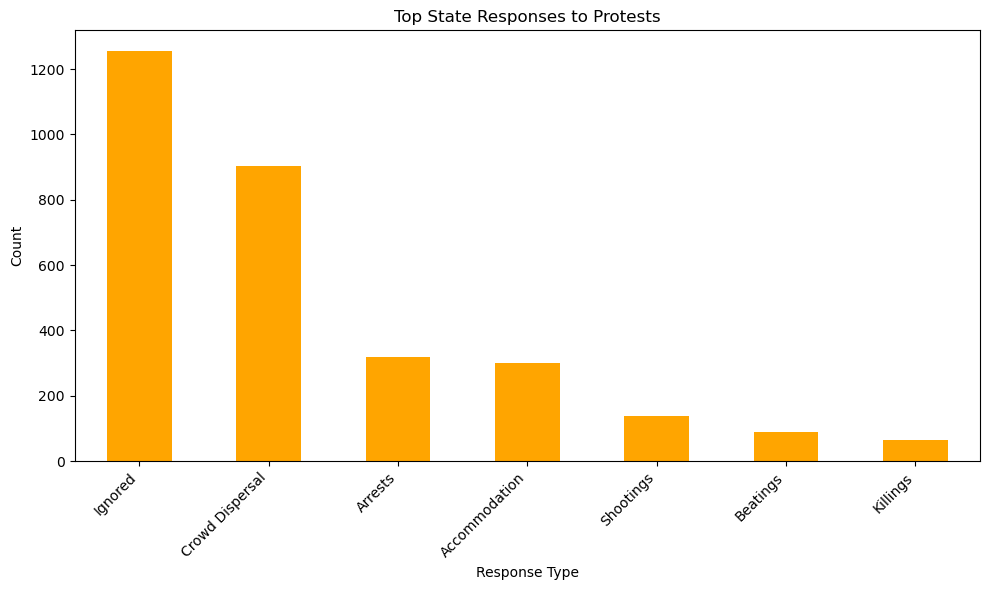

In [10]:
def simplify_state_response(response_str):
    if pd.isnull(response_str):
        return []

    categories = []
    for r in response_str.split(";"):
        r = r.strip().lower()
        if "arrest" in r:
            categories.append("Arrests")
        elif "crowd" in r:
            categories.append("Crowd Dispersal")
        elif "accom" in r:
            categories.append("Accommodation")
        elif "ignore" in r:
            categories.append("Ignored")
        elif "shoot" in r:
            categories.append("Shootings")
        elif "beating" in r:
            categories.append("Beatings")
        elif "kill" in r:
            categories.append("Killings")
        else:
            categories.append("Other/Unknown")
    return categories


# Apply to the full column and flatten the list of lists
all_responses = df["stateresponse1"].dropna().apply(simplify_state_response)
flattened = [item for sublist in all_responses for item in sublist]

# Count
response_counts = pd.Series(flattened).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
response_counts.plot(kind="bar", color="orange")
plt.title("Top State Responses to Protests")
plt.ylabel("Count")
plt.xlabel("Response Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


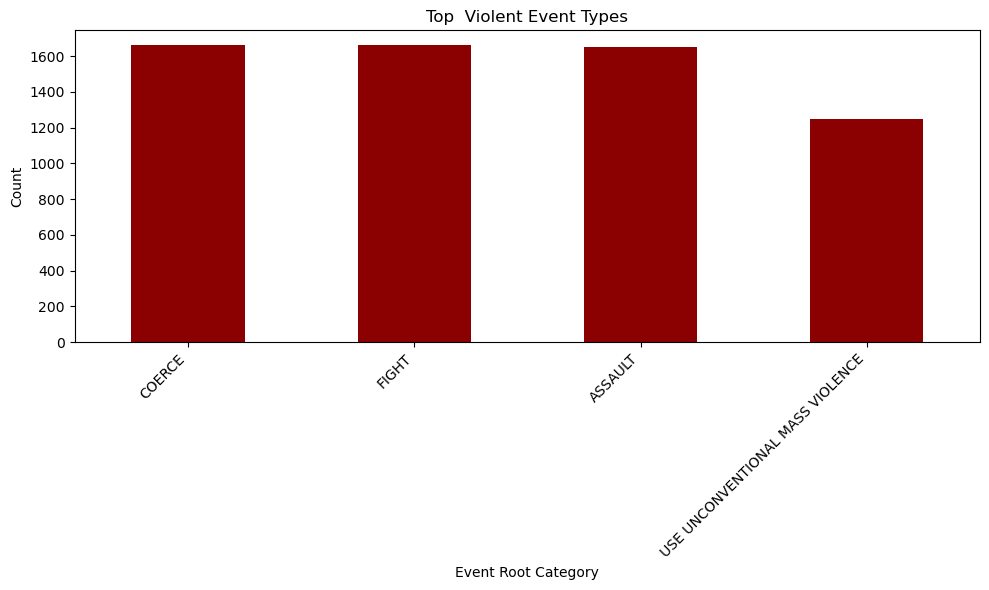

In [11]:
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=["EventRootDescr"])

# Split and explode
df_exploded["EventRootDescr"] = df_exploded["EventRootDescr"].str.split(";")
df_exploded = df_exploded.explode("EventRootDescr")

# Clean whitespaces and standardize
df_exploded["EventRootDescr"] = df_exploded["EventRootDescr"].str.strip().str.upper()

# Count and plot top 10 root-level event types
event_counts = df_exploded["EventRootDescr"].value_counts().head(10)

plt.figure(figsize=(10, 6))
event_counts.plot(kind="bar", color="darkred")
plt.title("Top  Violent Event Types")
plt.ylabel("Count")
plt.xlabel("Event Root Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
